<a href="https://colab.research.google.com/github/eldusastig/EMTECH-2/blob/main/TEAM_8_PRELIM_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:

Natiola, Henry Jay P. <br>
Duque, Jethro B <br>
Course and Section: CPE 019 - CPE32S9<br>
Date of Submission: 03/05/24<br>
Instructor: Engr. Roman Richard<br>

</br>


**Objectives:**

</br>
Choose any dataset applicable for classification and/or prediction analysis problems.  </br>
Show the application of the following algorithms: </br>
Linear Regression </br>
Singular LR </br>
Multiple LR </br>
Polynomial LR </br>
Logistic Regression </br>
Decision Tree </br>
Random Forest  </br>
Provide Evaluation reports for all models </br>

**Importing Libraries and Data**

In [ ]:
#Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

# Linear Regression

**A. Singular Linear Regression**

In [ ]:
url="https://raw.githubusercontent.com/eldusastig/EMTECH-2/Datasets/Restaurant_revenue%20(1).csv"
dataset=pd.read_csv(url)

print("Restaurant Dataset: ")
dataset.head()

Restaurant Dataset: 


,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [ ]:
rest_df=pd.DataFrame(dataset)
rest_df=rest_df.dropna()
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
rest_df["Cuisine_Type"].unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [ ]:
rest_df["Cuisine_Type"]=rest_df["Cuisine_Type"].replace({ 'Japanese':1, 'Italian':2, 'American':3, 'Mexican':4})

In [ ]:
rest_df.corr()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
Number_of_Customers,1.000000,0.033470,-0.007024,-0.012267,-0.013898,0.058693,-0.010140,0.745239
Menu_Price,0.033470,1.000000,0.016319,0.046115,0.020808,0.022068,0.003792,0.259579
Marketing_Spend,-0.007024,0.016319,1.000000,-0.054952,-0.058586,-0.041838,-0.031470,0.269929
Cuisine_Type,-0.012267,0.046115,-0.054952,1.000000,-0.022332,0.036294,-0.053819,-0.001989
Average_Customer_Spending,-0.013898,0.020808,-0.058586,-0.022332,1.000000,0.006620,0.054163,-0.035665
Promotions,0.058693,0.022068,-0.041838,0.036294,0.006620,1.000000,-0.021635,0.014869
Reviews,-0.010140,0.003792,-0.031470,-0.053819,0.054163,-0.021635,1.000000,-0.024946
Monthly_Revenue,0.745239,0.259579,0.269929,-0.001989,-0.035665,0.014869,-0.024946,1.000000


<Axes: xlabel='Number_of_Customers', ylabel='Monthly_Revenue'>

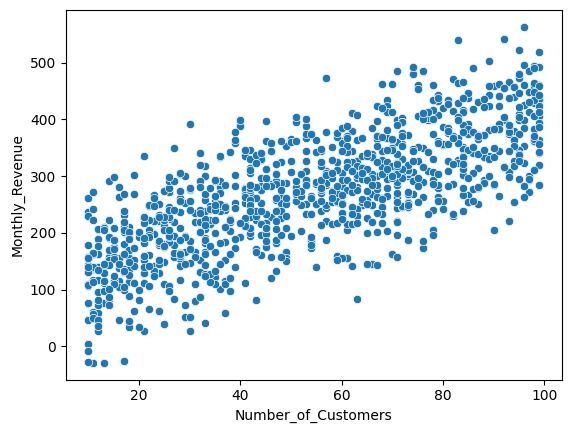

In [ ]:
sns.scatterplot(x="Number_of_Customers", y="Monthly_Revenue", data=rest_df)


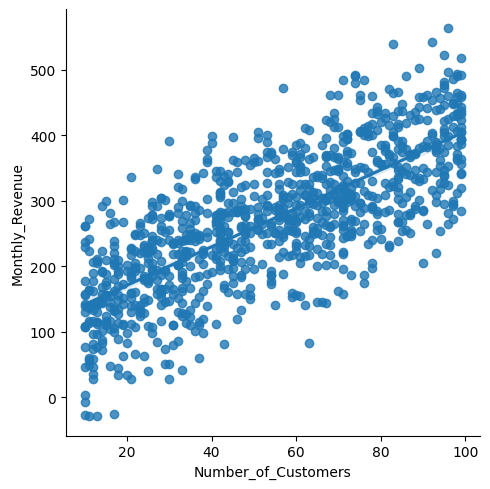

In [ ]:
sns.lmplot(x="Number_of_Customers", y="Monthly_Revenue", data=rest_df)


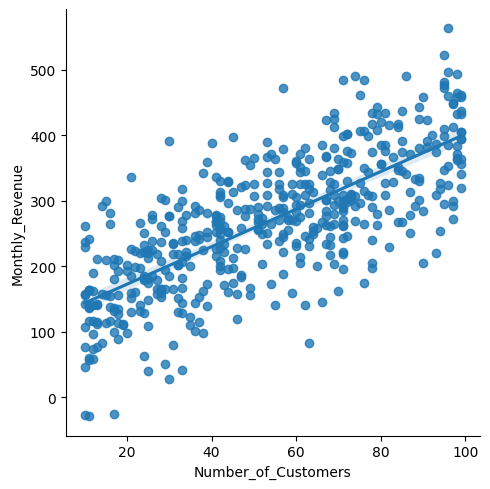

In [ ]:
sns.lmplot(x="Number_of_Customers", y="Monthly_Revenue", data=rest_df.head(500))


In [ ]:
linear=LinearRegression()
X = np.array(rest_df['Number_of_Customers'].head(500)).reshape(-1, 1)
y = np.array(rest_df['Monthly_Revenue'].head(500)).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)
linear.fit(X_train,y_train)


LinearRegression()

In [ ]:
pred_test=linear.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_test), 2))
print("R2 score =", round(sm.r2_score(y_test, pred_test), 2))

Mean absolute error = 45.47
R2 score = 0.63


In [ ]:
dframe=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':pred_test.flatten()})
dframe.head(25)

,Actual,Predicted
0,249.136435,238.488788
1,254.641502,385.317464
2,142.274004,156.603565
3,163.807329,150.956309
4,139.365550,150.956309
5,297.288588,244.136045
6,172.933631,230.017903
7,442.854958,371.199322
8,46.675136,148.132680
9,380.144581,294.961356


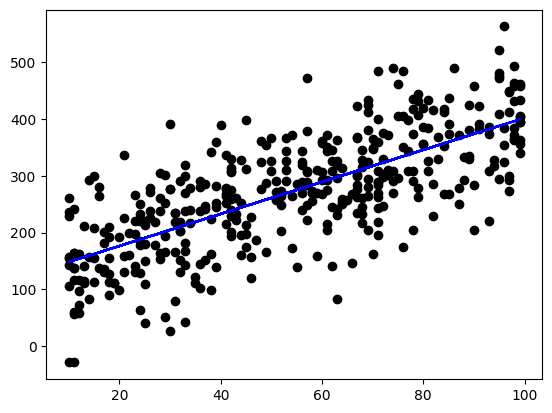

In [ ]:
plt.scatter(X_train,y_train,color='k')
plt.plot(X_test, pred_test,color='b')
plt.show()

**Multiple Linear Regression**

In [ ]:
x=rest_df.drop(columns="Monthly_Revenue")
y=rest_df["Monthly_Revenue"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 1)

In [ ]:

linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_test=linear.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))

Mean absolute error = 48.81
R2 score = 0.7


Text(0.5, 1.0, 'Distribution of Errors')

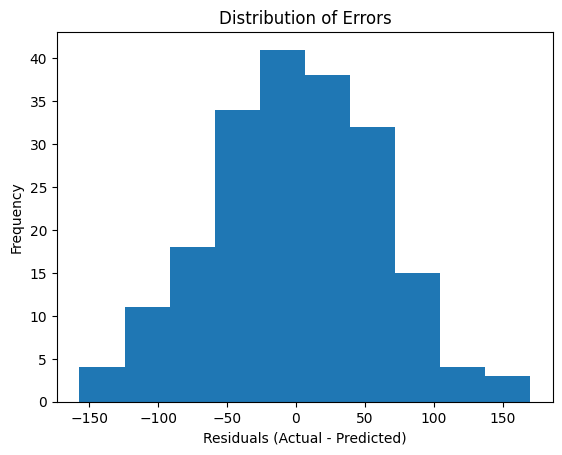

In [ ]:
plt.hist(y_test-y_pred_test)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")

In [ ]:
y_train_pred=linear.predict(X_train)

Text(0.5, 1.0, 'Predicted vs. Actual Monthly Revenue')

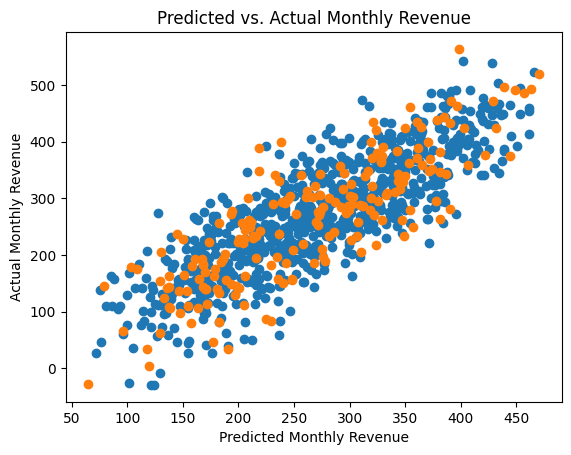

In [ ]:
plt.scatter(y_train_pred, y_train, label="Training Data")
plt.scatter(y_pred_test, y_test, label="Testing Data")
plt.xlabel("Predicted Monthly Revenue")
plt.ylabel("Actual Monthly Revenue")
plt.title("Predicted vs. Actual Monthly Revenue")

**Polynomial Regression**

In [ ]:
url="https://gist.githubusercontent.com/inoccu/139294a0476751fbfd1cde4110edbbab/raw/eb2d487390a1d0ca29d2c0f3fef947a2a3505382/housing.csv"
dataset=pd.read_csv(url)
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
house_df=pd.DataFrame(dataset)

In [ ]:
house_df.corr()

In [ ]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
X=np.array(house_df["MEDV"]).reshape(-1,1)
Y=np.array(house_df["LSTAT"]).reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [ ]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train)
model=linear.fit(X_poly,y_train)
X_test_poly = poly.transform(X_test)

y_pred=linear.predict(X_test_poly)


In [ ]:

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 3.15
R2 score = 0.67


In [ ]:
coef=np.array(model.coef_).reshape(-1,1)
intercept=np.array(model.intercept_)


In [ ]:
print(coef)

[[ 0.        ]
 [-1.68782375]
 [ 0.02033194]]


In [ ]:
print(intercept)

[38.51100328]


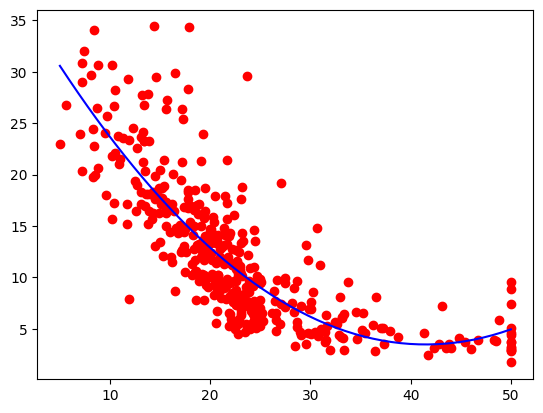

In [ ]:

x_axis=np.linspace(X_train.min(), X_train.max(), 50)
response= intercept+coef[1]* x_axis+coef[2]* x_axis**2
plt.scatter(X_train,y_train,color='r')
plt.plot(x_axis,response,color='b')
plt.show()


# Logistic Regression

In [ ]:
# Importing the needed Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
# Read the dataset containing injury data
url1 = "https://raw.githubusercontent.com/Jayryy/CPE-019-CPE32S9/main/Dataset/injury_data.csv"
data = pd.read_csv(url1)

In [ ]:
# Displaying the total entries in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [ ]:
# Displaying the first 10 row of the dataset
data.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


In [ ]:
# Choosing variable in the dataset
X = data[['Player_Age', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time']]
y = data['Likelihood_of_Injury']

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features using StandardScaler:
scaler = StandardScaler()
# Fit the scaler to the training data and transform it.
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the scaler fitted on the training data.
x_test_scaled = scaler.transform(X_test)

In [ ]:
# Creating a logistic regression model
LogReg = LogisticRegression()

In [ ]:
# Fitting it into the scaled training data
LogReg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Making predictions on the scaled testing data
y_pred = LogReg.predict(x_test_scaled)

In [ ]:
# Evaluation of the Model
print("Confusion Matrix:")
print(sm.confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(sm.classification_report(y_test, y_pred))

Confusion Matrix:
[[61 34]
 [52 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.64      0.59        95
           1       0.61      0.50      0.55       105

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.58      0.57      0.57       200



In [ ]:
# Create a Logistic Regression model
LogR = LogisticRegression(C=5)
# Fitting the model using the training data and the test data
LogR.fit(X_train,y_train)

LogisticRegression(C=5)

In [ ]:
# Calculating the accuracy of the train by using the train model
train_LogR = LogR.score(X_train,y_train)
print(f"Accuracy: {train_LogR}")

Accuracy: 0.54625


In [ ]:
# Calculating the accuracy of the test by using the train model
test_LogR = LogR.score(X_test,y_test)
print(f"Accuracy: {test_LogR}")

Accuracy: 0.57


# **Decision Tree**

In [ ]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Read the dataset containing injury data
url1 = "https://raw.githubusercontent.com/Jayryy/CPE-019-CPE32S9/main/Dataset/injury_data.csv"
Inj = pd.read_csv(url1)

In [ ]:
# Displaying the dataset
Inj

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
...,...,...,...,...,...,...,...
995,23,99.147910,165.290912,0,0.077857,3,1
996,23,75.799934,178.132281,1,0.955448,1,0
997,20,78.479061,173.823908,0,0.246961,1,1
998,24,66.915802,197.616889,1,0.859645,2,0


In [ ]:
# Displaying the first 10 rows of the dataset
Inj.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


In [ ]:
# Preparing the input features and the target variable from the dataset
columns = ["Player_Age", "Previous_Injuries", "Training_Intensity", "Recovery_Time",]
# Converting the selected features into a NumPy array
X_input = Inj[list(columns)].values
# Extracting the target variable
y_target = Inj["Likelihood_of_Injury"].values
X_train,X_test, y_train,y_test=train_test_split(X_input,y_target,train_size=0.80,random_state=0)

In [ ]:
# Splitting nodes with a max depth of 3
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Fitting the classifier using the input features
clf_train = clf_train.fit(X_train, y_train)

In [ ]:
# Calculating the accuracy score with the classifier
clf_train.score(X_test,y_test)

0.5

In [ ]:
# Exporting the trained Decision Tree classifier to a Graphviz DOT file for visualization
from six import StringIO
with open("/content/injury_data.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [ ]:
# Converting the graphvix DOT file into a png file
!dot -Tpng /content/injury_data.dot -o /content/injury_data.png

In [ ]:
# Importing the image
from IPython.display import Image

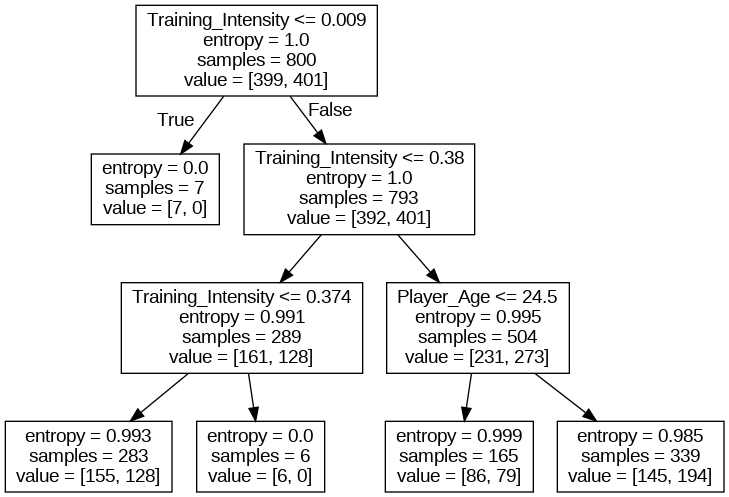

In [ ]:
# Displaying the image
Image("/content/injury_data.png")

In [ ]:

train_score=str(clf_train.score(X_train, y_train))
test_score=str(clf_train.score(X_test,y_test))
print('Training score = '+ train_score+' Testing score = '+test_score)


Training score = 0.56 Testing score = 0.5


# **Random Forest**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the dataset
url1 = "https://raw.githubusercontent.com/Jayryy/CPE-019-CPE32S9/main/Dataset/injury_data.csv"
Injury_Data = pd.read_csv(url1)

In [ ]:
# Displaying the first 10 row of the dataset
Injury_Data.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


In [ ]:
# Drop rows with missing target values
Injury_Data = Injury_Data.dropna(subset=['Likelihood_of_Injury'])

In [ ]:
# Select relevant features and target variable
X = Injury_Data[["Player_Age", "Previous_Injuries", "Training_Intensity", "Recovery_Time"]]
y = Injury_Data['Likelihood_of_Injury']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = sm.accuracy_score(y_test, y_pred)
classification_rep = sm.classification_report(y_test, y_pred)

In [ ]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.55        95
           1       0.58      0.53      0.55       105

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

